In [462]:
import pandas as pd
import numpy as np
import datetime as dt
from math import floor

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('/Users/yoannabriel/Documents/GitHub/Rush5PDG4/DataOut.csv', sep=",")
df_copy = df.copy()
df.head()

,Unnamed: 0,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67
1,1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70
2,2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59
3,3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40
4,4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43


In [463]:
#feature engineering 
df = df.set_index('ID')

In [464]:
df_copy['Age'] = df['Age']

In [465]:
print("Columns with string datatype are:")
for col in df.columns:
    if df[col].dtypes == object:
        print(col)

Columns with string datatype are:
Education
Marital_Status
Dt_Customer


In [466]:
df_Edu = pd.DataFrame(df['Education'].value_counts()).reset_index()
df_Edu.columns = ['Education', 'Count']

In [467]:
df['Education'] = np.where(df['Education'] == '2n Cycle', 'Master', df['Education'])

In [468]:
df_Edu = pd.DataFrame(df['Education'].value_counts()).reset_index()
df_Edu.columns = ['Education', 'Count']

fig = px.bar(df_Edu,
            x='Education',
            y='Count',
            color='Education')
fig.update_layout(width=800, height=400, title='Education ')
fig.show()

In [469]:
# df['h# df['hasKid'] = np.where((df['Kidhome'] + df['Teenhome'] > 0), 1, 0)
df['Kids'] = df['Kidhome'] + df['Teenhome']

df['Kids'].describe()

count    2236.000000
mean        0.950805
std         0.752204
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Kids, dtype: float64

In [470]:
df_Mar = pd.DataFrame(df['Marital_Status'].value_counts()).reset_index()
df_Mar.columns = ['Marital_Status', 'Count']
df_Mar

,Marital_Status,Count
0,Married,864
1,Together,578
2,Single,479
3,Divorced,231
4,Widow,77
5,Alone,3
6,Absurd,2
7,YOLO,2


In [471]:
df_Edu = pd.DataFrame(df['Marital_Status'].value_counts()).reset_index()
df_Edu.columns = ['Marital_Status', 'Count']

fig = px.bar(df_Edu,
            x='Marital_Status',
            y='Count',
            color='Marital_Status')
fig.update_layout(width=800, height=400, title='Education ')
fig.show()

In [472]:
df.head()

,Unnamed: 0,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,0
2174,1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,2
4141,2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,0
6182,3,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,1
5324,4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,1


In [473]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], utc=False)

In [474]:
last_enrollment = pd.to_datetime(df['Dt_Customer'].max(), utc=False)
df['Days_Enrolled'] = (last_enrollment-df['Dt_Customer']).dt.days

In [475]:
df.drop(columns = ['Kidhome', 'Teenhome'], inplace=True)
df.head()

,Unnamed: 0,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Days_Enrolled
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,0,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,0,663
2174,1,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,2,113
4141,2,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,0,312
6182,3,Graduation,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,1,139
5324,4,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,1,161


In [476]:
df['Total_Spend'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace=True)

print(f"Customer with most recent non transaction streak is {df['Recency'].min()} days while customer with longest non transaction streak is {df['Recency'].max()} days")


Customer with most recent non transaction streak is 0 days while customer with longest non transaction streak is 99 days


In [477]:
df[df['Recency'] <= 7].shape

(184, 22)

In [478]:
df[(df['Recency']>7) & (df['Recency'] <= 14 )].shape

(171, 22)

In [479]:
df[(df['Recency']>14) & (df['Recency'] <= 21 )].shape


(143, 22)

In [480]:
df['Recency_'] = df['Recency']/14
df['Recency_'] = df['Recency_'].apply(lambda x: floor(x))

In [481]:
df_Recency_ = pd.DataFrame(df['Recency_'].value_counts()).reset_index()
df_Recency_.columns = ['Recency', 'Count']

fig = px.bar(df_Recency_,
            x='Recency',
            y='Count',
            color='Recency')
fig.update_layout(width=800, height=400, title='Recency (x14 days) ')
fig.show()


In [482]:
df['Recency_'] = df['Recency_'].apply(lambda x : str(x))
df.drop(columns = ['Recency'], inplace=True)
df.head()


,Unnamed: 0,Education,Marital_Status,Income,Dt_Customer,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Days_Enrolled,Total_Spend,Recency_
ID,,,,,,,,,,,,,,,,,,,,,,
5524,0,Graduation,Single,58138.0,2012-09-04,3,8,10,4,7,0,0,0,0,0,0,1,67,0,663,1617,4
2174,1,Graduation,Single,46344.0,2014-03-08,2,1,1,2,5,0,0,0,0,0,0,0,70,2,113,27,2
4141,2,Graduation,Together,71613.0,2013-08-21,1,8,2,10,4,0,0,0,0,0,0,0,59,0,312,776,1
6182,3,Graduation,Together,26646.0,2014-02-10,2,2,0,4,6,0,0,0,0,0,0,0,40,1,139,53,1
5324,4,PhD,Married,58293.0,2014-01-19,5,5,3,6,5,0,0,0,0,0,0,0,43,1,161,422,6


In [483]:
df['CouponsAccepted'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebVisitsMonth'], inplace=True)

In [484]:
df.rename(columns={'NumStorePurchases':'Store_Purchases'}, inplace=True)
df['Non_Store_Purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']

In [485]:
df['Total_Purchases'] = df['Store_Purchases']+df['Non_Store_Purchases']
df['Store_Purchases_Pct'] = df['Store_Purchases']/df['Total_Purchases']
df['Non_Store_Purchases_Pct'] = 1-df['Store_Purchases_Pct']
df['Customer_Type'] = np.where(df['Store_Purchases_Pct'] >= 0.5, "Offline", "Online")
df.head()


,Unnamed: 0,Education,Marital_Status,Income,Dt_Customer,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,Store_Purchases,Complain,Age,Kids,Days_Enrolled,Total_Spend,Recency_,CouponsAccepted,Non_Store_Purchases,Total_Purchases,Store_Purchases_Pct,Non_Store_Purchases_Pct,Customer_Type
ID,,,,,,,,,,,,,,,,,,,,,
5524,0,Graduation,Single,58138.0,2012-09-04,3,8,10,4,0,67,0,663,1617,4,1,18,22,0.181818,0.818182,Online
2174,1,Graduation,Single,46344.0,2014-03-08,2,1,1,2,0,70,2,113,27,2,0,2,4,0.500000,0.500000,Offline
4141,2,Graduation,Together,71613.0,2013-08-21,1,8,2,10,0,59,0,312,776,1,0,10,20,0.500000,0.500000,Offline
6182,3,Graduation,Together,26646.0,2014-02-10,2,2,0,4,0,40,1,139,53,1,0,2,6,0.666667,0.333333,Offline
5324,4,PhD,Married,58293.0,2014-01-19,5,5,3,6,0,43,1,161,422,6,0,8,14,0.428571,0.571429,Online


In [486]:
df.drop(columns=['Store_Purchases_Pct', 'Non_Store_Purchases_Pct', 'Non_Store_Purchases', 'NumWebPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Store_Purchases'], inplace=True)


In [487]:
print(f"The youngest customer is {df['Age'].min()} years old and oldest customer is {df['Age'].max()} years old")

The youngest customer is 28 years old and oldest customer is 84 years old


In [488]:
trace0 = go.Box(
    y=df['Income'],
    name='Income'
)

trace1 = go.Box(
    y=df['Age'],
    name='Age'
)

trace2 = go.Box(
    y=df['NumDealsPurchases'],
    name='Deals Purchases'
)

trace3 = go.Box(
    y=df['Total_Spend'],
    name='Total Spend'
)

trace4 = go.Box(
    y=df['CouponsAccepted'],
    name='Coupons Accepted'
)

trace5 = go.Box(
    y=df['Total_Purchases'],
    name='Total Purchases'
)



fig = make_subplots(rows=2, cols=3)

fig.append_trace(trace0, row = 1, col = 1)
fig.append_trace(trace1, row = 1, col = 2)
fig.append_trace(trace2, row = 1, col = 3)
fig.append_trace(trace3, row = 2, col = 1)
fig.append_trace(trace4, row = 2, col = 2)
fig.append_trace(trace5, row = 2, col = 3)

fig.update_layout(width=800, height=400, title='Box Plot to check for outliers')

fig.show()

In [489]:
# df['Age'] = np.where(df['Age'] <= 30, "(0,30]", np.where(df['Age'] <= 45, "(30,45]", np.where(df['Age'] <= 60, "(45,60]","[60, ]")))
df['Age'] = np.where(df['Age'] <= 30, "(0,30]", np.where(df['Age'] <= 40, "(30,40]", np.where(df['Age'] <= 50, "(40,50]", np.where(df['Age'] <= 60, "(50, 60]", np.where(df['Age'] <=70, "(60, 70]", (70, ))))))

In [490]:
del df['Customer_Type']
del df['Complain']
del df['Unnamed: 0']

In [491]:
df_ = df.copy()
df_.reset_index(inplace=True)

In [492]:
#scaling


int_list = []
for col in df.columns:
    if df[col].dtypes == int or df[col].dtypes == float:
        int_list.append(col)
print(int_list)

['Income', 'NumDealsPurchases', 'Kids', 'Days_Enrolled', 'Total_Spend', 'CouponsAccepted', 'Total_Purchases']


In [493]:
autoscaler = StandardScaler()
df[int_list] = autoscaler.fit_transform(df[int_list])

In [494]:
df.dtypes

Education                    object
Marital_Status               object
Income                      float64
Dt_Customer          datetime64[ns]
NumDealsPurchases           float64
Age                          object
Kids                        float64
Days_Enrolled               float64
Total_Spend                 float64
Recency_                     object
CouponsAccepted             float64
Total_Purchases             float64
dtype: object

In [495]:
df.reset_index('ID', inplace=True)

In [496]:
df.reset_index(inplace=True)

In [497]:
obj_col = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_col.append(col)
obj_col

['Education', 'Marital_Status', 'Age', 'Recency_']

In [498]:
#Normalisation

onehotencoder = OneHotEncoder() 
data = pd.DataFrame(onehotencoder.fit_transform(df[['Age', 'Recency_']]).toarray())
data = data.reset_index()
df = pd.merge(left = df, right = data, on = 'index')
df = df.drop(columns = ['Age'])


obj_col = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_col.append(col)
obj_col

['Education', 'Marital_Status', 'Recency_']

In [499]:
label_encoder = LabelEncoder()
for col in obj_col:
    df[col] = label_encoder.fit_transform(df[col])

df.head()


,index,ID,Education,Marital_Status,Income,Dt_Customer,NumDealsPurchases,Kids,Days_Enrolled,Total_Spend,Recency_,CouponsAccepted,Total_Purchases,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,5524,1,4,0.288513,2012-09-04,0.348738,-1.264308,1.529793,1.680176,4,0.620456,1.312080,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2174,1,4,-0.262438,2014-03-08,-0.168700,1.395139,-1.191143,-0.962202,2,-0.501987,-1.186198,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,4141,1,5,0.917992,2013-08-21,-0.686137,-1.264308,-0.206659,0.282541,1,-0.501987,1.034493,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,6182,1,5,-1.182621,2014-02-10,-0.168700,0.065416,-1.062517,-0.918994,1,-0.501987,-0.908611,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5324,3,3,0.295754,2014-01-19,1.383614,0.065416,-0.953679,-0.305762,6,-0.501987,0.201734,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [500]:
df.drop(columns=[df.columns[0]], inplace=True)
df.set_index('ID', inplace=True)

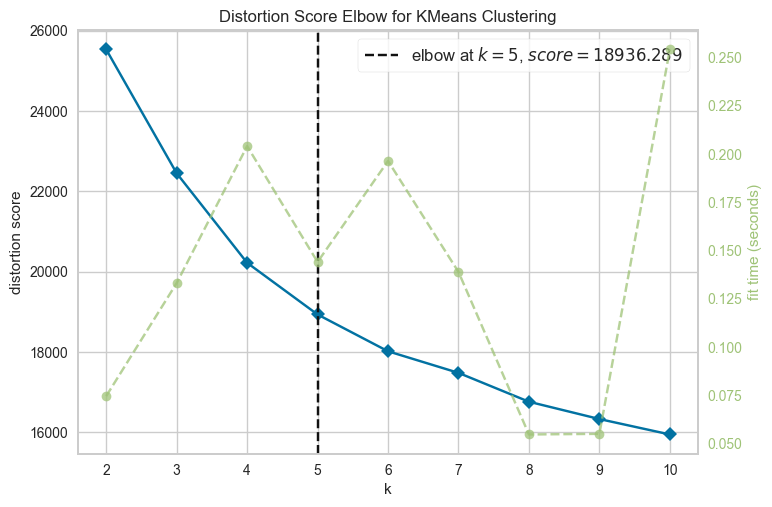

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [501]:
# Exclure les colonnes de type DateTime avant de passer au modèle
df_numeric = df.select_dtypes(exclude=['datetime64'])

# Convertir tous les noms de colonnes en chaînes de caractères
df_numeric.columns = df_numeric.columns.astype(str)

# Appliquer KMeans avec l'Elbow visualizer
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=10, random_state=42)

visualizer.fit(df_numeric)
visualizer.show()


In [504]:
# Convertir les noms de colonnes en chaînes de caractères
df.columns = df.columns.astype(str)

# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Appliquer KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(df_numeric)
pred = kmeans.predict(df_numeric)

# Ajouter les prédictions au DataFrame original
df['Cluster'] = pred + 1


In [506]:
df = df.reset_index('ID')


In [507]:
df_ = pd.merge(df_, df[['ID', 'Cluster']], how='left')
df_['Cluster'] = df_['Cluster'].astype('str')
df_['Cluster'] = np.where(df_['Cluster'] == '1', "Cluster 1", np.where(df_['Cluster'] == '2', "Cluster 2", np.where(df_['Cluster'] == '3', "Cluster 3", "Cluster 4")))

In [508]:
df_Edu = pd.DataFrame(df_['Cluster'].value_counts()).reset_index()
df_Edu.columns = ['Cluster', 'Count']

fig = go.Figure(data=[go.Pie(labels=df_Edu['Cluster'], values=df_Edu['Count'], hole=.3)])
fig.update_layout(width=800, height=400, title='Cluster')
fig.show()

In [ ]:
fig = px.scatter(df_, x="Income", y="Total_Spend",
                 color="Cluster",
                 hover_data=['Total_Spend', 'Income', 'Cluster'])

fig.update_layout(
    title="Spend vs Income Plot",
    xaxis_title = "Spend",
    yaxis_title = "Income",
    width = 900, height=600
)

fig.show()